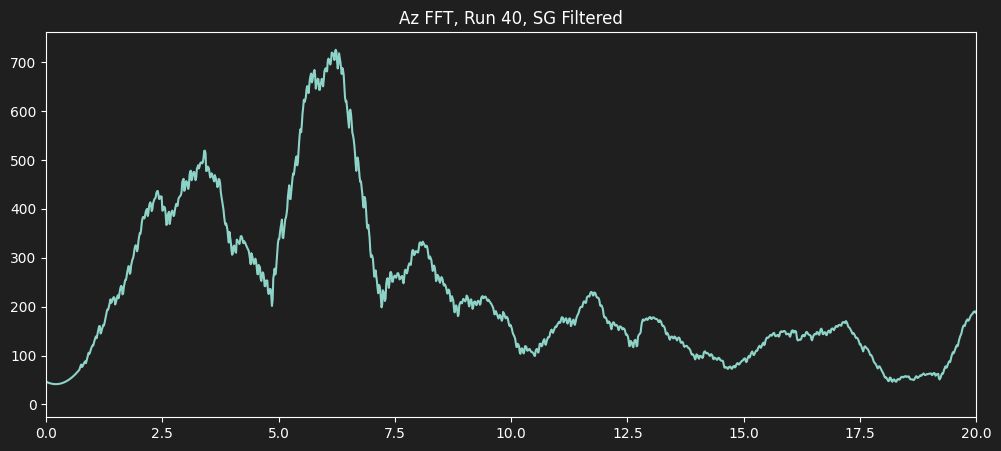

<Figure size 1200x800 with 0 Axes>

In [1]:
%matplotlib inline

from harmony_util import *
import numpy as np
import matplotlib.pyplot as plt


folder = 'C:/Users/kyleh/Desktop/Axicle/Steve Krug - Public/15. GitHub Repo/Axicle/07-Harmony/test_data/trucksim_runs_3-27/'
ltr = load_ts_case(folder + 'run1040.csv', 0, 0)

freqs, x = smooth_fft(ltr.front.az, ltr.front.fs)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,5))
fig.patch.set_facecolor('#1F1F1F')
ax.patch.set_facecolor('#1F1F1F')
#plt.ylim((0,.25))
plt.title("Az FFT, Run 40, SG Filtered")
plt.xlim((0,20))
plt.figure(figsize=(12,8), dpi= 100)
ax.plot(freqs, x)




In [2]:


for i in range(1,100):
    ltr = load_ts_case(folder + 'run' + str(1000+i) + '.csv', 0, 0)

    freqs, faz = smooth_fft(ltr.front.az, ltr.front.fs)
    freqs, fwx = smooth_fft(ltr.front.wx, ltr.front.fs)
    freqs, baz = smooth_fft(ltr.back.az, ltr.back.fs)
    freqs, bwx = smooth_fft(ltr.back.wx, ltr.back.fs)

    tdi = np.concatenate((faz, fwx, baz, bwx))

    if i==1:
        t = np.zeros((len(freqs)*4, 100))
    
    t[:,i-1] = tdi

t = np.transpose(t)

 

In [3]:
t_targ = np.genfromtxt(folder + 'input.csv', delimiter=",")[:,0:2]

for i in range(0, len(t_targ)):

    t_targ[i,1] = t_targ[i,0] * t_targ[i,1]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import random

train = np.array(t[0,:])
train_targ = np.array(t_targ[0,:])
test = np.array(t[1,:])
test_targ = np.array(t_targ[1,:])

for i in range(2,99):
    if random.choice([True, False]):
        train = np.column_stack((train, t[i,:]))
        train_targ = np.column_stack((train_targ, t_targ[i,:]))
    else:
        test = np.column_stack((test, t[i,:]))
        test_targ = np.column_stack((test_targ, t_targ[i,:]))


train = train.T
train_targ = train_targ.T
test = test.T
test_targ = test_targ.T

m = RandomForestRegressor(max_depth=4, random_state=0)
m.fit(train, train_targ)
pred = m.predict(test)


In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
fig.patch.set_facecolor('#1F1F1F')
ax.patch.set_facecolor('#1F1F1F')

 
# creating the bar plot
x = np.arange(len(test[:,0]))
plt.bar(x-0.2, test_targ[:,0], width = 0.4, color='tab:blue')
plt.bar(x+0.2, pred[:,0], width = 0.4, color='tab:red')
 
plt.xlabel("Run")
plt.ylabel("Mass (kg)")
plt.title("Load Mass")
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
fig.patch.set_facecolor('#1F1F1F')
ax.patch.set_facecolor('#1F1F1F')
 
# creating the bar plot
x = np.arange(len(test[:,0]))
plt.bar(x-0.2, test_targ[:,1], width = 0.4, color='tab:blue')
plt.bar(x+0.2, pred[:,1], width = 0.4, color='tab:red')
 
plt.xlabel("Run")
plt.ylabel("CG Height (m)")
plt.title("CG Height")
plt.legend(['Actual', 'Predicted'])
plt.show()
